In [1]:
%reset
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import random
import treecorr
from astropy.io import fits
import pickle as pk
import os.path
from os import path




Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [47]:
old_f = np.loadtxt('/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/L3072N4096-LC129-1in700.dat')



In [48]:
old_f.shape
# 


(50865143, 3)

In [31]:
df = np.loadtxt('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.269')



In [32]:
df.shape
# nobj = df.shape[0]/3
# ind = np.random.randint(0, nobj, df.shape[0])
# print ind

# #


(156964, 4)

In [4]:
# ind = np.random.randint(0,10000,df.shape[0])
# plt.figure
# plt.scatter(df[ind,0],df[ind,1])
# plt.show()




In [5]:
# old_f.shape[0]/(1.0*df.shape[0])



In [39]:
basedir = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/'

# fext = np.linspace(0,2442,2443)
# fext = np.linspace(0,2442,10)

fext1 = np.arange(1000)

fext2 = np.arange(1000,2000)

fext3 = np.arange(2000,2443)

for i in range(2,3):
    if i == 0:
        fext = fext1
    
    if i == 1:
        fext = fext2
    
    if i == 2:
        fext = fext3
        
    ra, dec, z_true = [], [], []
    for j in range(len(fext)):
        if np.mod(j, 10) == 0:
            print j
        filename = basedir + 'lightcone_129_1in100.' + str(int(fext[j]))
        if path.isfile(filename):
            data = np.loadtxt(filename)

            if len(data) > 0:
                nobj = data.shape[0]/3
                if nobj > 1:
                    ind = np.unique(np.random.randint(0, nobj, data.shape[0]))
                    if len(ra) == 0:
                        ra = data[ind, 0]

                        dec = data[ind, 1]
                        z_true = data[ind, 2]
                    else:
                        ra = np.hstack((ra,data[ind, 0]))
                        dec = np.hstack((dec,data[ind, 1]))
                        z_true = np.hstack((z_true,data[ind, 2]))
                else:
                    print('tile ' + str(j) + ' has less objects')

            else:
                print('tile ' + str(j) + ' has no objects')

    c1 = fits.Column(name='RA', array=np.array(ra), format='E')
    c2 = fits.Column(name='DEC', array=np.array(dec), format='E')
    c3 = fits.Column(name='Z', array=np.array(z_true), format='E')

    t = fits.BinTableHDU.from_columns([c1, c2, c3])
    t.writeto( '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in300_ind_' + str(np.min(fext)) + '_' + str(np.max(fext)) + '.fits', clobber=True)    


    



0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:28: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2163"
/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:28: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2165"


tile 163 has no objects
tile 165 has no objects
170
180
190
200


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:28: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2204"


tile 204 has no objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:28: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2209"


tile 209 has no objects
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440


In [10]:
basedir = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/'

# fext = np.linspace(0,2442,2443)
# fext = np.linspace(0,2442,10)

fext1 = np.arange(1000)

fext2 = np.arange(1000,2000)

fext3 = np.arange(2000,2443)

for i in range(1,3):
    if i == 0:
        fext = fext1
    
    if i == 1:
        fext = fext2
    
    if i == 2:
        fext = fext3
        
    ra, dec, z_true = [], [], []
    for j in range(len(fext)):
        if np.mod(j, 10) == 0:
            print j
        filename = basedir + 'lightcone_129_1in100.' + str(int(fext[j]))
        data = np.loadtxt(filename)

        if len(data) > 0:
            nobj = data.shape[0]/6
            if nobj > 100:
                ind = np.random.randint(0, nobj, data.shape[0])
                if len(ra) == 0:
                    ra = data[ind, 0]
                    dec = data[ind, 1]
                    z_true = data[ind, 2]
                else:
                    ra = np.hstack((ra,data[ind, 0]))
                    dec = np.hstack((dec,data[ind, 1]))
                    z_true = np.hstack((z_true,data[ind, 2]))
                    
            else:
                print('tile ' + str(j) + ' has less objects')
            
        else:
            print('tile ' + str(j) + ' has no objects')

    c1 = fits.Column(name='RA', array=np.array(ra), format='E')
    c2 = fits.Column(name='DEC', array=np.array(dec), format='E')
    c3 = fits.Column(name='Z', array=np.array(z_true), format='E')

    t = fits.BinTableHDU.from_columns([c1, c2, c3])
    t.writeto( '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in600_ind_' + str(np.min(fext)) + '_' + str(np.max(fext)) + '.fits', clobber=True)    


    




0
10
20
tile 20 has less objects
30
40
50
tile 54 has less objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1057"


tile 57 has no objects
60
tile 64 has less objects
tile 69 has less objects
70
80
90
100
110
120
tile 121 has less objects
tile 122 has less objects
tile 125 has less objects
130
tile 133 has less objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1137"


tile 137 has no objects
140
150


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1155"


tile 155 has no objects
160
170
180
190


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1193"


tile 193 has no objects
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
tile 560 has no objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1560"


570


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1578"


tile 578 has no objects
580
590
600


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1602"


tile 602 has no objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1604"


tile 604 has no objects
610
tile 617 has less objects
620
tile 623 has less objects
630


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1636"


tile 636 has no objects
640
650
660
tile 666 has less objects
670
680
690
700
710
720
tile 726 has less objects
730
740
tile 746 has less objects
750
760
tile 764 has less objects
770


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1779"


tile 779 has no objects
780
tile 783 has less objects
tile 786 has less objects
790
tile 790 has less objects
800
tile 807 has less objects
810
tile 813 has less objects
820
tile 821 has less objects
830
840
tile 841 has less objects
850
860
870
880
890
tile 899 has less objects
900
910
920
930
940
950
tile 950 has no objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1950"


tile 953 has less objects
tile 958 has less objects
960
970


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1973"


tile 973 has no objects
980


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.1988"


tile 988 has no objects
990
tile 997 has less objects


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2163"


tile 163 has no objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2165"


tile 165 has no objects
170
180
190
200


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2204"


tile 204 has no objects


/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:27: UserWarning: loadtxt: Empty input file: "/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2209"


tile 209 has no objects
210
220
230
240
250
260


ValueError: could not convert string to float: **********

In [38]:
import pdb
basedir = '/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/'

# fext = np.linspace(0,2442,2443)
# fext = np.linspace(0,2442,10)

fext1 = np.arange(1000)

fext2 = np.arange(1000,2000)

fext3 = np.arange(2267,2270)

for i in range(2,3):
    if i == 0:
        fext = fext1
    
    if i == 1:
        fext = fext2
    
    if i == 2:
        fext = fext3
        
    ra, dec, z_true = [], [], []
    for j in range(len(fext)):
        
        print j
        filename = basedir + 'lightcone_129_1in100.' + str(int(fext[j]))
        pdb.set_trace()
        data = np.loadtxt(filename)

        if len(data) > 0:
            nobj = data.shape[0]/6
            if nobj > 100:
                ind = np.random.randint(0, nobj, data.shape[0])
                if len(ra) == 0:
                    ra = data[ind, 0]
                    dec = data[ind, 1]
                    z_true = data[ind, 2]
                else:
                    ra = np.hstack((ra,data[ind, 0]))
                    dec = np.hstack((dec,data[ind, 1]))
                    z_true = np.hstack((z_true,data[ind, 2]))
                    
            else:
                print('tile ' + str(j) + ' has less objects')
            
        else:
            print('tile ' + str(j) + ' has no objects')

    c1 = fits.Column(name='RA', array=np.array(ra), format='E')
    c2 = fits.Column(name='DEC', array=np.array(dec), format='E')
    c3 = fits.Column(name='Z', array=np.array(z_true), format='E')

    t = fits.BinTableHDU.from_columns([c1, c2, c3])
#     t.writeto( '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in600_ind_' + str(np.min(fext)) + '_' + str(np.max(fext)) + '.fits', clobber=True)    


    





0
> <ipython-input-38-9c7bcfc3e168>(29)<module>()
-> data = np.loadtxt(filename)


(Pdb)  np.loadtxt(filename)


*** ValueError: could not convert string to float: **********


(Pdb)  filename


'/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/matter1in100/lightcone_129_1in100.2267'


(Pdb)  q


BdbQuit: 

In [2]:
mcat1 = fits.open('/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in300_ind_0_999.fits')
mcat2 = fits.open('/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in300_ind_1000_1999.fits')
mcat3 = fits.open('/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in300_ind_2000_2442.fits')




In [3]:
ra1, dec1, z1 = mcat1[1].data['RA'],mcat1[1].data['DEC'],mcat1[1].data['Z']

ra2, dec2, z2 = mcat2[1].data['RA'],mcat2[1].data['DEC'],mcat2[1].data['Z']

ra3, dec3, z3 = mcat3[1].data['RA'],mcat3[1].data['DEC'],mcat3[1].data['Z']


In [5]:
ra_f, dec_f, z_f = 90.-np.hstack((ra1, ra2, ra3)), np.hstack((dec1, dec2, dec3)), np.hstack((z1, z2, z3))




In [8]:
c1 = fits.Column(name='RA', array=np.array(ra_f), format='E')
c2 = fits.Column(name='DEC', array=np.array(dec_f), format='E')
c3 = fits.Column(name='Z', array=np.array(z_f), format='E')

t = fits.BinTableHDU.from_columns([c1, c2, c3])
t.writeto( '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in300' + '.fits', clobber=True)    






In [14]:
ind = np.unique(np.random.randint(0, len(ra_f)/10., len(ra_f)))

c1 = fits.Column(name='RA', array=np.array(ra_f[ind]), format='E')
c2 = fits.Column(name='DEC', array=np.array(dec_f[ind]), format='E')
c3 = fits.Column(name='Z', array=np.array(z_f[ind]), format='E')

t = fits.BinTableHDU.from_columns([c1, c2, c3])
t.writeto( '/global/project/projectdirs/des/y3-bias/MICE_all_data/v2/matter_ra_dec_z_L3072N4096-LC129-1in3000' + '.fits', clobber=True)    







/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10


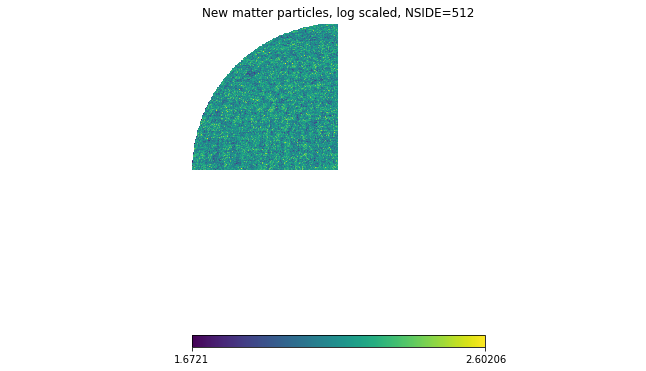

In [38]:
import healpy as hp
def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

nside = 512
# ind = np.unique(np.random.randint(0, len(ra_f), 100*nside**2))
ind = np.where(z_f < 1.0)[0]

theta_m, phi_m = eq2ang(ra_f[ind], dec_f[ind])
# theta_m, phi_m = eq2ang(ra_f, dec_f)
ind_m_f = hp.ang2pix(nside, theta_m, phi_m)
ind_vals, ind_count = np.unique(ind_m_f, return_counts=True)
map_new = np.zeros(hp.nside2npix(nside))
for j in range(len(ind_vals)):
    ind_val = ind_vals[j]
    map_new[ind_val] = ind_count[j]
plt.figure()
hp.mollview(np.log10(map_new), title='New matter particles, log scaled, NSIDE=' + str(nside))
plt.savefig('new_mice_matter_cat_nside_' + str(nside) + '.png',dpi=480)



In [39]:
cat_old = fits.open('/global/project/projectdirs/des/shivamp/actxdes/data_set/mice_sims/process_cats/matter_ra_dec_r_z_bin_jk_L3072N4096-LC129-1in700_njkradec_180_njkz_1.fits')

ra_o, dec_o, z_o = cat_old[1].data['RA'], cat_old[1].data['DEC'], cat_old[1].data['Z']

print len(ra_o),len(ra_f)




50865143 112701570


In [40]:
# ind = np.unique(np.random.randint(0, len(ra_o), 100*nside**2))
# nside = 32
ind = np.where(z_o < 1.0)[0]

theta_m, phi_m = eq2ang(ra_o[ind], dec_o[ind])
# theta_m, phi_m = eq2ang(ra_o, dec_o)
ind_m_f = hp.ang2pix(nside, theta_m, phi_m)
ind_vals, ind_count = np.unique(ind_m_f, return_counts=True)
map_old = np.zeros(hp.nside2npix(nside))
for j in range(len(ind_vals)):
    ind_val = ind_vals[j]
    map_old[ind_val] = ind_count[j]






/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


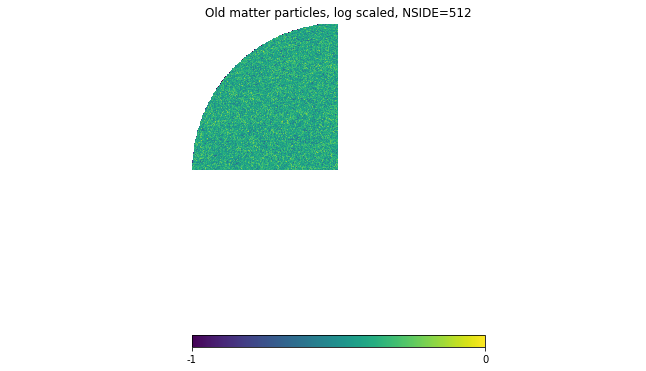

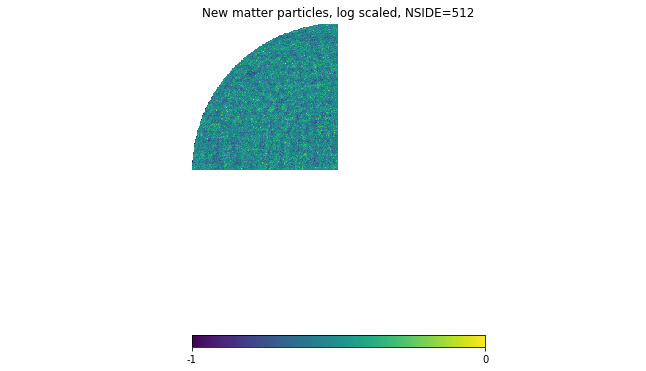

In [41]:
plt.figure()
hp.mollview(np.log10(map_old/np.max(map_old) ), title='Old matter particles, log scaled, NSIDE=' + str(nside), min=-1, max=0.0)
plt.savefig('old_mice_matter_cat_nside_' + str(nside) + '.png',dpi=480)

plt.figure()
hp.mollview(np.log10(map_new/np.max(map_new)), title='New matter particles, log scaled, NSIDE=' + str(nside), min=-1, max=0.0)
plt.savefig('new_mice_matter_cat_nside_' + str(nside) + '.png',dpi=480)



In [42]:
import pymaster as nmt

mask = np.zeros(hp.nside2npix(nside))
ind_pos = np.where(map_new > 0)[0]
mask[ind_pos] = 1
mask_nmt = nmt.mask_apodization(mask,1.0, apotype="Smooth")




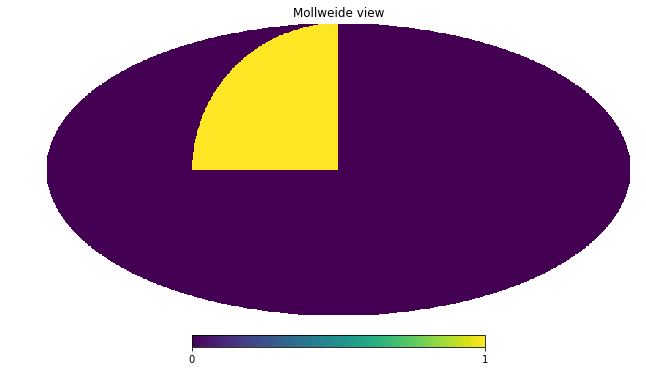

In [43]:
hp.mollview(mask)



In [44]:
f_old = nmt.NmtField(mask_nmt, [map_old])
f_new = nmt.NmtField(mask_nmt, [map_new])




In [45]:
b = nmt.NmtBin(nside, nlb=4)



In [46]:
cl_old_old = nmt.compute_full_master(f_old, f_old, b)

# print cl_old_old


In [47]:
cl_new_new = nmt.compute_full_master(f_new, f_new, b)

# print cl_new_new




In [48]:
cl_old_new = nmt.compute_full_master(f_old, f_new, b)

# print cl_old_new




In [49]:
ell_arr = b.get_effective_ells()




In [30]:
cl_old_new




array([[ 1.66454426e+04, -3.24800605e+03,  7.30399430e+02,
        -1.50830716e+02,  3.90816200e+01, -6.87727132e+00,
         3.49297587e+00,  2.29278105e-01,  8.19944510e-01,
         2.13059920e-01,  5.15376760e-01,  3.40421636e-02,
         4.04614182e-01,  1.40422631e-01,  1.45302915e-01,
         3.68491857e-02,  3.97940333e-02,  6.40679378e-02,
         8.43638732e-02, -8.63600517e-02,  9.05362310e-02,
         6.54412966e-02, -4.26146263e-02, -2.38621843e-02,
         4.62118578e-02,  4.96249407e-03,  3.43425339e-02,
         3.14106742e-02,  5.68331364e-03,  3.82067390e-02,
         7.56413843e-03,  2.42540352e-02,  2.46761228e-02,
         2.38314181e-02,  9.20920002e-03,  2.67008005e-02,
         3.93621177e-03,  2.41266458e-02,  1.41055496e-02,
         1.51333534e-02,  8.55374535e-03,  1.46796887e-02,
         1.32501846e-02,  1.37701707e-02,  1.42680321e-02,
         6.99977632e-03,  7.99858123e-03,  1.37599370e-02,
         1.13161104e-02,  9.23255044e-03,  7.46323884e-0

/global/u1/s/spandey/myenv_new/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


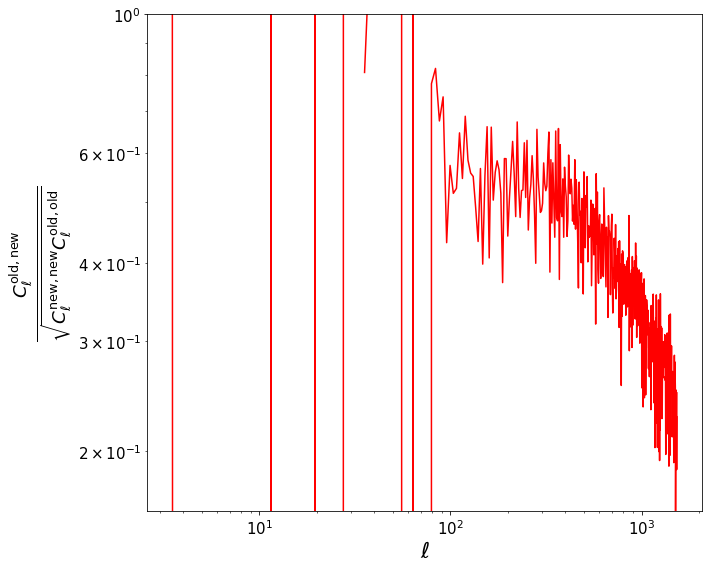

In [50]:
fig, ax = plt.subplots(1,1, figsize = (10,8))

ax.plot(ell_arr, (cl_old_new[0])/(np.sqrt(cl_old_old[0] * cl_new_new[0])), 'r-')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(-1,1)
plt.xlabel(r'$\ell$', fontsize=22)
plt.ylabel(r'$\frac{C^{\rm old,new}_\ell}{\sqrt{C^{\rm new,new}_\ell C^{\rm old,old}_\ell}}$', fontsize=26)
# ax.legend(fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.tight_layout()
plt.savefig('cross_corr_comp.png')






In [37]:
(12*64**2)/8


6144